<a href="https://colab.research.google.com/github/BitnooriLee/ML-project-Thermal-Conductivity-Prediction/blob/main/Master_Thesis_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
# Import Data set
from google.colab import drive
drive.mount('/content/gdrive')

# specify the path to the .xlsx files
path = '/content/gdrive/My Drive/MasterThesis2023/data/Bit_data/'

# list to store the data from each .xlsx file
data_frames_parameters = []
data_frames_results = []
data_frames_T_t = []

# loop through each .xlsx file in the path
for file in os.listdir(path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(path, file)
        try:
            # read the 'Parameters' sheet from the current .xlsx file
            df_parameters = pd.read_excel(file_path, sheet_name='Parameters',header=1, engine='openpyxl')
            df_results = pd.read_excel(file_path, sheet_name='Results',header=1, engine='openpyxl')
            df_T_t = pd.read_excel(file_path, sheet_name='T-t',header=3, engine='openpyxl')
            # add the data from the current .xlsx file to the list of data_frames
            data_frames_parameters.append(df_parameters)
            data_frames_results.append(df_results)
            data_frames_T_t.append(df_T_t.T)
        except FileNotFoundError:
            print(f"The file {file_path} was not found. Skipping...")

# concatenate all the data from the data_frames list into one dataframe
result_parameters = pd.concat(data_frames_parameters)
result_results = pd.concat(data_frames_results)
result_T_t = pd.concat(data_frames_T_t)

# remove duplicates
result_parameters = result_parameters[result_parameters.index == 0]
result_results = result_results[result_results.index == 0]

# write the result dataframe to a new excel file
result_parameters.to_excel("combined_data_parameters.xlsx", index=False)
result_results.to_excel("combined_data_results.xlsx", index=False)

# read the combined data from the newly created excel file
combined_data_parameters = pd.read_excel("combined_data_parameters.xlsx", engine='openpyxl')
combined_data_results = pd.read_excel("combined_data_results.xlsx", engine='openpyxl')

combined_data_parameters_select = combined_data_parameters[['File','Outp.power.','Radius','TCR']]

combined_data_results_select = combined_data_results[['File','Disk Res.','Th.Conductivity']]

merged_result = pd.merge(combined_data_parameters_select, combined_data_results_select, on='File')

merged_result[['Th.Conductivity', 'Disk Res.','Outp.power.','Radius','TCR' ]] = merged_result[['Th.Conductivity', 'Disk Res.','Outp.power.','Radius','TCR' ]].apply(lambda x: pd.to_numeric(x))

# list to store the data from each .xlsx file
data_frames_T_t_time = []
data_frames_T_t_temp = []

# loop through each .xlsx file in the path
for file in os.listdir(path):
    if file.endswith(".xlsx"):
        file_path = os.path.join(path, file)
        try:
            # read the 'Parameters' sheet from the current .xlsx file
            df_T_t_new = pd.read_excel(file_path, sheet_name='T-t',header=3, engine='openpyxl')

            # add a new column 'File' to the dataframe
            df_T_t_new['File'] = file

            if 'Time' in df_T_t_new.columns and 'Temp' in df_T_t_new.columns:
                data_frames_T_t_time.append(df_T_t_new[['Time']].transpose())
                data_frames_T_t_temp.append(df_T_t_new[['Temp']].transpose())

        except FileNotFoundError:
            print(f"The file {file_path} was not found. Skipping...")

# concatenate all the data from the data_frames list into one dataframe

result_T_t_time = pd.concat(data_frames_T_t_time, axis=0)
result_T_t_temp = pd.concat(data_frames_T_t_temp, axis=0)


# write the result dataframe to a new excel file
result_T_t_time.to_excel("combined_data_T_t_time.xlsx", index=False)
result_T_t_temp.to_excel("combined_data_T_t_temp.xlsx", index=False)

# read the combined data from the newly created excel file
combined_data_T_t_time = pd.read_excel("combined_data_T_t_time.xlsx", engine='openpyxl')
combined_data_T_t_temp = pd.read_excel("combined_data_T_t_temp.xlsx", engine='openpyxl')
combined_data_T_t_time = combined_data_T_t_time.iloc[:, 50:150]
combined_data_T_t_temp = combined_data_T_t_temp.iloc[:, 50:150]

combined_data_T_t_time_sqrt = combined_data_T_t_time**(1/2)


time_temp_result = pd.concat([combined_data_T_t_time, combined_data_T_t_temp], axis=1)
time_temp_result_sqrt = pd.concat([combined_data_T_t_time_sqrt, combined_data_T_t_temp], axis=1)

n = combined_data_T_t_time.shape[1]

# create a list of column indices in the desired order
column_indices = [i//2 + n*(i%2) for i in range(2*n)]

# shuffle the DataFrame columns using the list of indices
time_temp_result_shuffled = time_temp_result.iloc[:, column_indices]

# print the shuffled DataFrame
time_temp_result_shuffled

# normalized temp
normalized_factor =merged_result['Outp.power.']/merged_result['Radius'] #pow/radious
normalized_factor.to_frame()
result_T_t_temp_normalized = result_T_t_temp.mul(normalized_factor[0], axis=0)

result_T_t_temp_normalized.to_excel("combined_data_T_t_temp_normalized.xlsx", index=False)

# read the combined data from the newly created excel file

combined_data_T_t_temp_normalized = pd.read_excel("combined_data_T_t_temp_normalized.xlsx", engine='openpyxl')
combined_data_T_t_temp_normalized = combined_data_T_t_temp_normalized.iloc[:, 50:150]

time_temp_result_normalized = pd.concat([combined_data_T_t_time, combined_data_T_t_temp_normalized], axis=1)

merge_t_parameter_result_normalized = pd.concat([time_temp_result_normalized, merged_result], axis=1)
merge_t_parameter_result_normalized =  merge_t_parameter_result_normalized.drop('File', axis=1)
merge_t_parameter_result_normalized =  merge_t_parameter_result_normalized.drop('Outp.power.', axis=1)
merge_t_parameter_result_normalized =  merge_t_parameter_result_normalized.drop('Radius', axis=1)

merge_t_parameter_result = pd.concat([time_temp_result, merged_result], axis=1)
merge_t_parameter_result =  merge_t_parameter_result.drop('File', axis=1)

merge_t_parameter_result_sqrt = pd.concat([time_temp_result_sqrt, merged_result], axis=1)
merge_t_parameter_result_sqrt =  merge_t_parameter_result_sqrt.drop('File', axis=1)

merge_t_parameter_shuffled_result = pd.concat([time_temp_result_shuffled, merged_result], axis=1)
merge_t_parameter_shuffled_result = merge_t_parameter_shuffled_result.drop('File', axis=1)

Mounted at /content/gdrive


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""C

In [ ]:
merged_result

,File,Outp.power.,Radius,TCR,Disk Res.,Th.Conductivity
0,C:\Besira\Manuscript\ML_data_II\Sample_D.hotb,50.0,6.403,0.004693,11.922912,0.177225
1,C:\Besira\Manuscript\ML_data_II\Sample_C.hotb,50.0,6.403,0.004665,11.906798,0.215254
2,C:\Besira\Manuscript\ML_data_II\Sample3.hotb,800.0,6.631,0.005059,4.409063,21.823104
3,H:\ML_data\spain_sample.hotb,1.0,6.631,0.004674,4.926028,17.367828
4,C:\Besira\Manuscript\ML_data_II\Sample1.hotb,1.5,6.403,0.005175,13.339339,20.688781
5,C:\Users\zijin\Documents\Hotdisk\Program\Zijin...,150.0,3.189,0.005050,3.475610,1.346721
6,C:\Besira\Manuscript\ML_data_II\Silcon_wafer_1...,2.0,9.868,0.004686,10.750355,84.963526
7,C:\Besira\Manuscript\ML_data_II\sand_2_loosepa...,80.0,3.189,0.005019,3.595126,0.379438
8,C:\Besira\Manuscript\ML_data_II\Silcon_wafer_3...,2.0,9.868,0.004686,11.425674,116.315506
9,C:\Besira\Manuscript\ML_data_II\Sand_1_nopress...,70.0,3.189,0.005019,3.592536,0.420243


In [ ]:
combined_data_results_select.sort_values(by='Th.Conductivity', ascending=False)

,File,Disk Res.,Th.Conductivity
46,C:\Besira\Manuscript\ML_data_II\DT090µm.slbb,1.429010,472.316115
34,Y:\Error and Results\Besira\Data collection\Co...,3.477916,398.545932
41,H:\ML_data\Cu.hotb,13.359976,395.236479
45,Z:\Error and Results\Besira\Data collection\Gr...,11.056965,185.359545
32,Z:\Error and Results\Besira\Data collection\Al...,14.121308,182.839125
8,C:\Besira\Manuscript\ML_data_II\Silcon_wafer_3...,11.425674,116.315506
40,Z:\Error and Results\Besira\Data collection\Br...,11.201896,114.274611
6,C:\Besira\Manuscript\ML_data_II\Silcon_wafer_1...,10.750355,84.963526
17,Z:\Error and Results\Besira\Data collection\OB...,1.445176,65.536561
42,Z:\Error and Results\Besira\Data collection\un...,12.603454,44.036294


In [ ]:

merge_t_parameter_result.columns = merge_t_parameter_result.columns.astype(str)
merge_t_parameter_shuffled_result.columns = merge_t_parameter_shuffled_result.columns.astype(str)
merge_t_parameter_result_sqrt.columns = merge_t_parameter_result_sqrt.columns.astype(str)
merge_t_parameter_result_normalized.columns = merge_t_parameter_result_normalized.columns.astype(str)

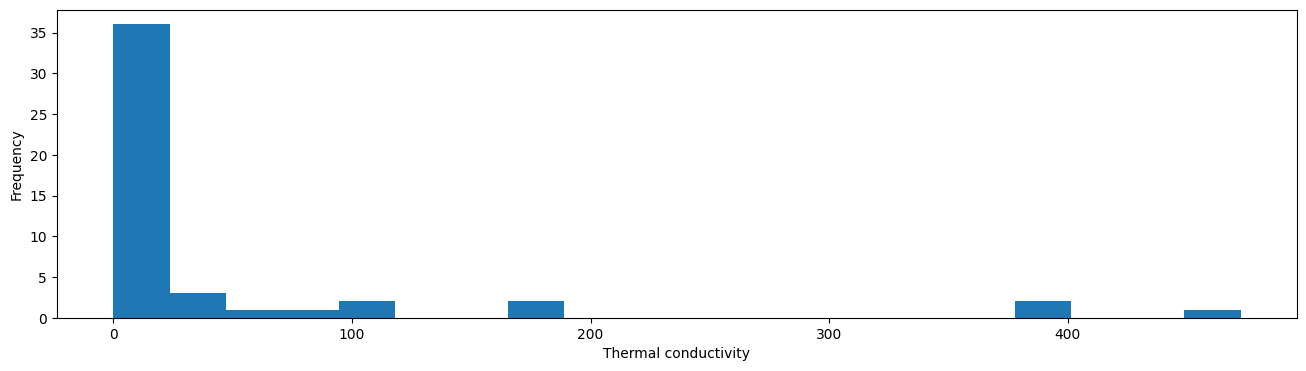

In [ ]:
import matplotlib.pyplot as plt
merge_t_parameter_result

# Get the values from Column A
column_a_values = merge_t_parameter_result['Th.Conductivity']

# Create a histogram plot of the column values
fig, ax = plt.subplots(figsize=(16, 4))

ax.hist(column_a_values, bins=20)  # adjust the number of bins as needed

# Add labels and title
ax.set_xlabel('Thermal conductivity')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()



In [ ]:
merge_t_parameter_result_sqrt_filtered_20 = merge_t_parameter_result_sqrt.loc[merge_t_parameter_result_sqrt['Th.Conductivity'] < 20] #32
merge_t_parameter_result_sqrt_filtered_1 = merge_t_parameter_result_sqrt.loc[merge_t_parameter_result_sqrt['Th.Conductivity'] < 1] # 20
merge_t_parameter_result_sqrt_filtered_1_50 = merge_t_parameter_result_sqrt.loc[(merge_t_parameter_result_sqrt['Th.Conductivity'] < 50) & (merge_t_parameter_result_sqrt['Th.Conductivity'] > 1)] # 1-50, 19
merge_t_parameter_result_sqrt_filtered_50 = merge_t_parameter_result_sqrt.loc[(merge_t_parameter_result_sqrt['Th.Conductivity'] < 50)] #39

merge_t_parameter_result_filtered_20 = merge_t_parameter_result.loc[merge_t_parameter_result['Th.Conductivity'] < 20] #32
merge_t_parameter_result_filtered_1 = merge_t_parameter_result.loc[merge_t_parameter_result['Th.Conductivity'] < 1] # 20
merge_t_parameter_result_filtered_1_50 = merge_t_parameter_result_sqrt.loc[(merge_t_parameter_result_sqrt['Th.Conductivity'] < 50) & (merge_t_parameter_result_sqrt['Th.Conductivity'] > 1)] # 1-50, 19
merge_t_parameter_result_filtered_50 = merge_t_parameter_result_sqrt.loc[(merge_t_parameter_result_sqrt['Th.Conductivity'] < 50)] #39


merge_t_parameter_result_normalized_filtered_20 = merge_t_parameter_result_normalized.loc[merge_t_parameter_result_normalized['Th.Conductivity'] < 20] #32
merge_t_parameter_result_normalized_filtered_1 = merge_t_parameter_result_normalized.loc[merge_t_parameter_result_normalized['Th.Conductivity'] < 1] # 20
merge_t_parameter_result_normalized_filtered_1_50 = merge_t_parameter_result_sqrt.loc[(merge_t_parameter_result_sqrt['Th.Conductivity'] < 50) & (merge_t_parameter_result_sqrt['Th.Conductivity'] > 1)] # 1-50, 19
merge_t_parameter_result_normalized_filtered_50 = merge_t_parameter_result_sqrt.loc[(merge_t_parameter_result_sqrt['Th.Conductivity'] < 50)] #39


merge_t_parameter_shuffled_result_filtered_20 = merge_t_parameter_shuffled_result.loc[merge_t_parameter_shuffled_result['Th.Conductivity'] < 20] #32
merge_t_parameter_shuffled_result_filtered_1 = merge_t_parameter_shuffled_result.loc[merge_t_parameter_shuffled_result['Th.Conductivity'] < 1] # 20
merge_t_parameter_shuffled_result_filtered_1_50 = merge_t_parameter_result_sqrt.loc[(merge_t_parameter_result_sqrt['Th.Conductivity'] < 50) & (merge_t_parameter_result_sqrt['Th.Conductivity'] > 1)] # 1-50, 19
merge_t_parameter_shuffled_result_filtered_50 = merge_t_parameter_result_sqrt.loc[(merge_t_parameter_result_sqrt['Th.Conductivity'] < 50)] #39


## filtered conductivity < 50

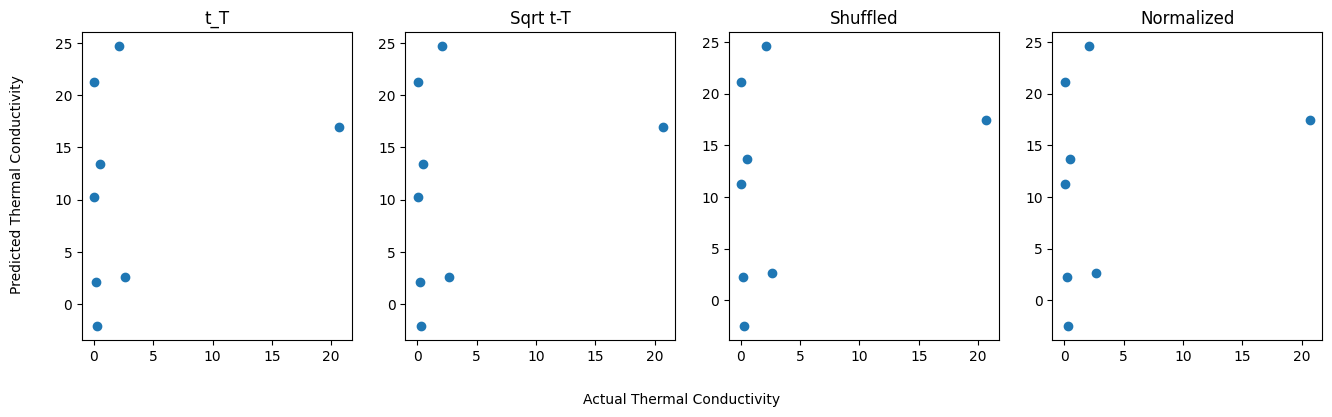

+------------+--------------------+---------------------+
| Data Type  | Mean Squared Error |   R-squared score   |
+------------+--------------------+---------------------+
|    t-T     | 157.00394684617228 | -2.5676420573809984 |
| Square t-T | 157.00394684617228 | -2.5676420573809984 |
|  Shuffled  | 159.31423001373977 | -2.6201392305963234 |
| Normalized | 159.31423001373977 | -2.6201392305963234 |
+------------+--------------------+---------------------+
157.004 & -2.568
157.004 & -2.568
159.314 & -2.62
159.314 & -2.62


In [ ]:
#Linear Regression  # filtered conductivity < 50
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()


# Import the data with 200 data points of temperature versus time and n independent parameters for each of the 48 materials

#merge_t_parameter_result = merge_t_parameter_result.apply(pd.to_numeric, errors='coerce')



# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result_filtered_50.iloc[:, :-1]
y_t_T = merge_t_parameter_result_filtered_50.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt_filtered_50.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt_filtered_50.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result_filtered_50.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result_filtered_50.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized_filtered_50.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized_filtered_50.iloc[:, -1]




# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)



# Scale the input features using StandardScaler
#scaler = StandardScaler()
#X_train_shuffled = scaler.fit_transform(X_train_shuffled)
# X_test_shuffled = scaler.transform(X_test_shuffled)


X_train_nomalized = scaler.fit_transform(X_train_nomalized)
X_test_nomalized = scaler.transform(X_test_nomalized)

X_train_shuffled = scaler.fit_transform(X_train_shuffled)
X_test_shuffled = scaler.transform(X_test_shuffled)

# Train a linear regression model
regressor1 = LinearRegression()
regressor2 = LinearRegression()
regressor3 = LinearRegression()
regressor4 = LinearRegression()

regressor1.fit(X_train_t_T, y_train_t_T)
regressor2.fit(X_train_sqrt,y_train_sqrt)
regressor3.fit(X_train_shuffled, y_train_shuffled)
regressor4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = regressor1.predict(X_test_t_T)
y_pred_sqrt = regressor2.predict(X_test_sqrt)
y_pred_shuffled = regressor3.predict(X_test_shuffled)
y_pred_nomalized = regressor4.predict(X_test_nomalized)


# Set up the plot grid
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Create scatter plots on each axis
axs[0].scatter(y_test_t_T, y_pred_t_T)
axs[1].scatter(y_test_sqrt, y_pred_sqrt)
axs[2].scatter(y_test_shuffled, y_pred_shuffled)
axs[3].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0].set_title('t_T')
axs[1].set_title('Sqrt t-T')
axs[2].set_title('Shuffled')
axs[3].set_title('Normalized')

# Set common x and y labels for the plot grid
fig.text(0.5, -0.05, "Actual Thermal Conductivity", ha='center')
fig.text(0.08, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)

from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['t-T', mse_t_T, regressor1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Square t-T', mse_sqrt, regressor2.score(X_test_sqrt, y_test_sqrt)])
table.add_row(['Shuffled', mse_shuffled, regressor3.score(X_test_shuffled, y_test_shuffled)])
table.add_row(['Normalized', mse_nomalized, regressor4.score(X_test_nomalized, y_test_nomalized)])

# print the table as a formatted output
print(table)



# print rounded result

print(mse_t_T.round(3), '&', regressor1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', regressor2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', regressor3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', regressor4.score(X_test_nomalized, y_test_nomalized).round(3))





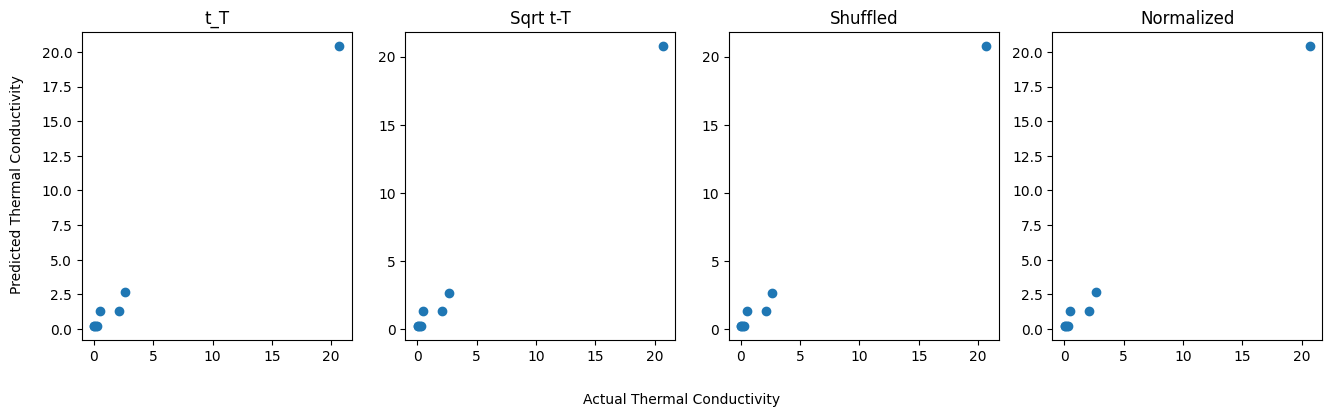

+------------+---------------------+--------------------+
| Data Type  |  Mean Squared Error |  R-squared score   |
+------------+---------------------+--------------------+
|    t-T     | 0.17535498116147855 | 0.9960153625540644 |
| Square t-T | 0.16770749946936409 | 0.996189138295795  |
|  Shuffled  | 0.16794171365761468 | 0.996183816185076  |
| Normalized | 0.17536821768953004 | 0.9960150617769494 |
+------------+---------------------+--------------------+
0.175 & 0.996
0.168 & 0.996
0.168 & 0.996
0.175 & 0.996


In [ ]:
#DecisionTreeRegressor  # filtered conductivity < 50

from sklearn.tree import DecisionTreeRegressor
import numpy as np
# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result_filtered_50.iloc[:, :-1]
y_t_T = merge_t_parameter_result_sqrt_filtered_50.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt_filtered_50.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt_filtered_50.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result_filtered_50.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result_filtered_50.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized_filtered_50.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized_filtered_50.iloc[:, -1]


# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)


# Fit a random forest regression model to the training data
model1 = DecisionTreeRegressor(max_depth=10)
model2 = DecisionTreeRegressor(max_depth=10)
model3 = DecisionTreeRegressor(max_depth=10)
model4 = DecisionTreeRegressor(max_depth=10)

model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_sqrt, y_train_sqrt)
model3.fit(X_train_shuffled, y_train_shuffled)
model4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = model1.predict(X_test_t_T)
y_pred_sqrt = model2.predict(X_test_sqrt)
y_pred_shuffled = model3.predict(X_test_shuffled)
y_pred_nomalized = model4.predict(X_test_nomalized)






# Set up the plot grid
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Create scatter plots on each axis
axs[0].scatter(y_test_t_T, y_pred_t_T)
axs[1].scatter(y_test_sqrt, y_pred_sqrt)
axs[2].scatter(y_test_shuffled, y_pred_shuffled)
axs[3].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0].set_title('t_T')
axs[1].set_title('Sqrt t-T')
axs[2].set_title('Shuffled')
axs[3].set_title('Normalized')

# Set common x and y labels for the plot grid
fig.text(0.5, -0.05, "Actual Thermal Conductivity", ha='center')
fig.text(0.08, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)



# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['t-T', mse_t_T, model1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Square t-T', mse_sqrt, model2.score(X_test_sqrt, y_test_sqrt)])
table.add_row(['Shuffled', mse_shuffled, model3.score(X_test_shuffled, y_test_shuffled)])
table.add_row(['Normalized', mse_nomalized, model4.score(X_test_nomalized, y_test_nomalized)])

# print the table as a formatted output
print(table)

print(mse_t_T.round(3), '&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', model2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', model3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', model4.score(X_test_nomalized, y_test_nomalized).round(3))





In [ ]:
differences = y_test_t_T - y_pred_t_T
mean_difference = sum(differences) / len(differences)
squared_differences = [(diff - mean_difference) ** 2 for diff in differences]
variance = sum(squared_differences) / len(squared_differences)
std = variance ** 0.5
mean_actual = sum(y_test_t_T) / len(y_test_t_T)
std_percent = (std / mean_actual) * 100
print(std_percent)

12.648611875724933


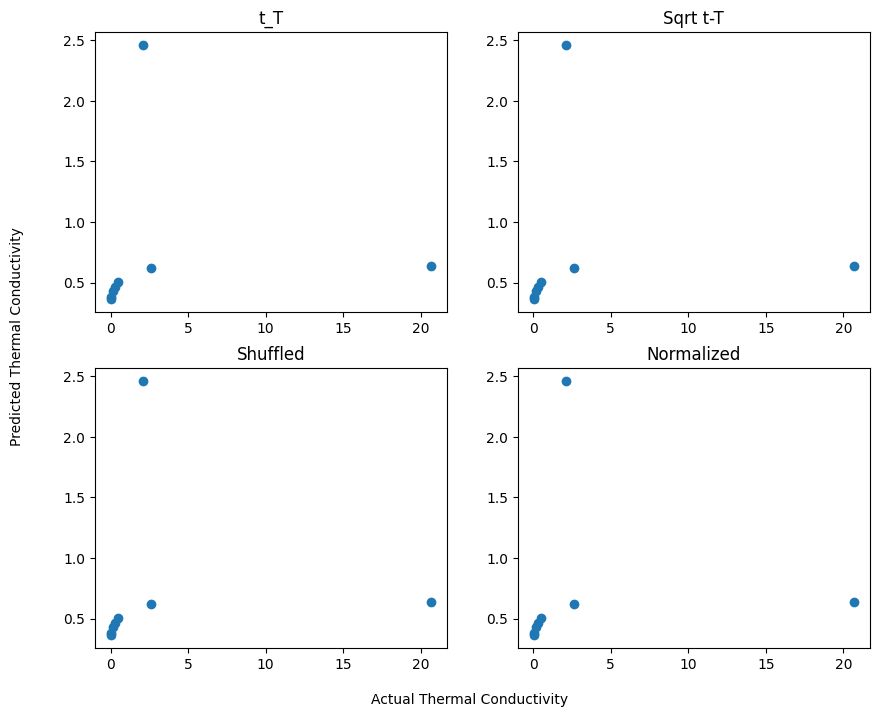

+------------+--------------------+---------------------+
| Data Type  | Mean Squared Error |   R-squared score   |
+------------+--------------------+---------------------+
|    t-T     | 50.81397853756971  | -0.1546594246519657 |
| Square t-T | 50.81397853756971  | -0.1546594246519657 |
|  Shuffled  | 50.81397853756971  | -0.1546594246519657 |
| Normalized | 50.81397853756971  | -0.1546594246519657 |
+------------+--------------------+---------------------+
50.814 & -0.155
50.814 & -0.155
50.814 & -0.155
50.814 & -0.155


In [ ]:

#SVR  # filtered conductivity < 50

from sklearn.svm import SVR
import numpy as np
# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


num_rows, num_cols = merge_t_parameter_result.shape
num_rows_norm, num_cols_norm = merge_t_parameter_result_normalized.shape

# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result_filtered_50.iloc[:, :-1]
y_t_T = merge_t_parameter_result_filtered_50.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt_filtered_50.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt_filtered_50.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result_filtered_50.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result_filtered_50.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized_filtered_50.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized_filtered_50.iloc[:, -1]


# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)


from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regression model to the training data
model1 = SVR(kernel='rbf', degree = 10) #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model2 = SVR(kernel='rbf', degree = 10)
model3 = SVR(kernel='rbf', degree = 10)
model4 = SVR(kernel='rbf', degree = 10)

model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_sqrt, y_train_sqrt)
model3.fit(X_train_shuffled, y_train_shuffled)
model4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = model1.predict(X_test_t_T)
y_pred_sqrt = model2.predict(X_test_sqrt)
y_pred_shuffled = model3.predict(X_test_shuffled)
y_pred_nomalized = model4.predict(X_test_nomalized)



# Plot the actual versus predicted thermal conductivity values
# Set up the plot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create scatter plots on each axis
axs[0, 0].scatter(y_test_t_T, y_pred_t_T)
axs[0, 1].scatter(y_test_sqrt, y_pred_sqrt)
axs[1, 0].scatter(y_test_shuffled, y_pred_shuffled)
axs[1, 1].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0, 0].set_title('t_T')
axs[0, 1].set_title('Sqrt t-T')
axs[1, 0].set_title('Shuffled')
axs[1, 1].set_title('Normalized')


# Set common x and y labels for the plot grid
fig.text(0.5, 0.04, "Actual Thermal Conductivity", ha='center')
fig.text(0.04, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')



# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)




from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['t-T', mse_t_T, model1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Square t-T', mse_sqrt, model2.score(X_test_sqrt, y_test_sqrt)])
table.add_row(['Shuffled', mse_shuffled, model3.score(X_test_shuffled, y_test_shuffled)])
table.add_row(['Normalized', mse_nomalized, model4.score(X_test_nomalized, y_test_nomalized)])


# print the table as a formatted output
print(table)

print(mse_t_T.round(3), '&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', model2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', model3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', model4.score(X_test_nomalized, y_test_nomalized).round(3))


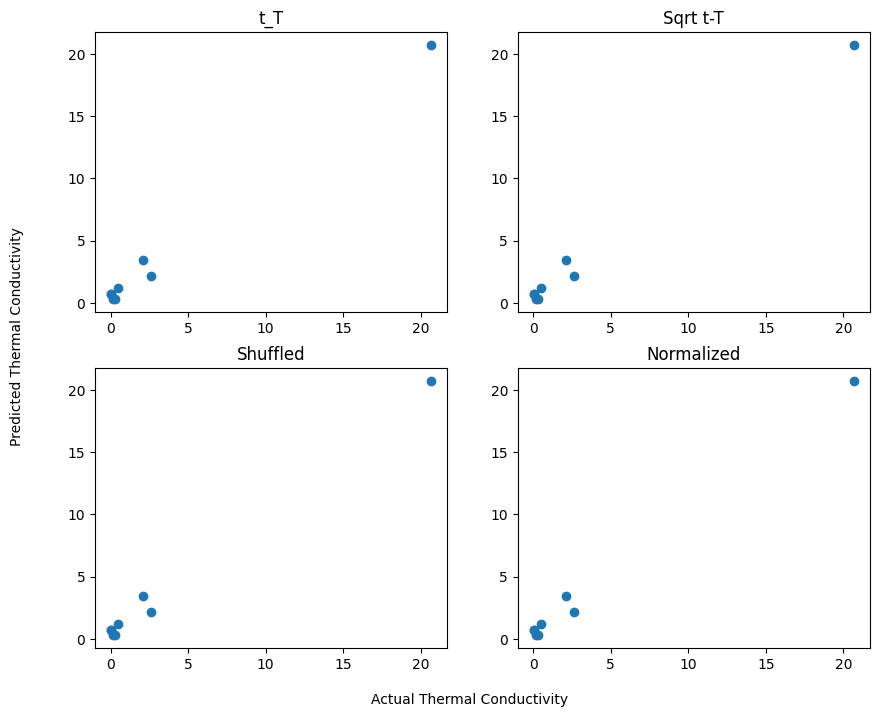

+------------+--------------------+--------------------+------------------------------+
| Data Type  | Mean Squared Error |  R-squared score   | Coefficient of determination |
+------------+--------------------+--------------------+------------------------------+
|    t-T     | 0.4242693800810979 | 0.9903592150742598 |      0.9903592150742598      |
| Square t-T | 0.4242693800810979 | 0.9903592150742598 |      0.9903592150742598      |
|  Shuffled  | 0.4242693800810979 | 0.9903592150742598 |      0.9903592150742598      |
| Normalized | 0.4242693800810979 | 0.9903592150742598 |      0.9903592150742598      |
+------------+--------------------+--------------------+------------------------------+
0.424 & 0.99
0.424 & 0.99
0.424 & 0.99
0.424 & 0.99


In [ ]:

#RandomForestRegressor  # filtered conductivity < 50

from sklearn.ensemble import RandomForestRegressor


num_rows, num_cols = merge_t_parameter_result.shape
num_rows_norm, num_cols_norm = merge_t_parameter_result_normalized.shape

# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result_filtered_50.iloc[:, :-1]
y_t_T = merge_t_parameter_result_filtered_50.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt_filtered_50.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt_filtered_50.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result_filtered_50.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result_filtered_50.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized_filtered_50.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized_filtered_50.iloc[:, -1]



# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)

# Fit a random forest regression model to the training data
model1 = RandomForestRegressor(n_estimators=1000, random_state=0)
model2 = RandomForestRegressor(n_estimators=1000, random_state=0)
model3 = RandomForestRegressor(n_estimators=1000, random_state=0)
model4 = RandomForestRegressor(n_estimators=1000, random_state=0)

model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_sqrt, y_train_sqrt)
model3.fit(X_train_shuffled, y_train_shuffled)
model4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = model1.predict(X_test_t_T)
y_pred_sqrt = model2.predict(X_test_sqrt)
y_pred_shuffled = model3.predict(X_test_shuffled)
y_pred_nomalized = model4.predict(X_test_nomalized)



# Plot the actual versus predicted thermal conductivity values
# Set up the plot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create scatter plots on each axis
axs[0, 0].scatter(y_test_t_T, y_pred_t_T)
axs[0, 1].scatter(y_test_sqrt, y_pred_sqrt)
axs[1, 0].scatter(y_test_shuffled, y_pred_shuffled)
axs[1, 1].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0, 0].set_title('t_T')
axs[0, 1].set_title('Sqrt t-T')
axs[1, 0].set_title('Shuffled')
axs[1, 1].set_title('Normalized')


# Set common x and y labels for the plot grid
fig.text(0.5, 0.04, "Actual Thermal Conductivity", ha='center')
fig.text(0.04, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
r2_t_T = r2_score(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
r2_sqrt = r2_score(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
r2_shuffled = r2_score(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)
r2_nomalized = r2_score(y_test_nomalized, y_pred_nomalized)
cod_t_T = 1 - mse_t_T/np.var(y_test_t_T)
cod_sqrt = 1 - mse_sqrt/np.var(y_test_sqrt)
cod_shuffled = 1 - mse_shuffled/np.var(y_test_shuffled)
cod_nomalized = 1 - mse_nomalized/np.var(y_test_nomalized)

from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score', 'Coefficient of determination'])
table.add_row(['t-T', mse_t_T, model1.score(X_test_t_T, y_test_t_T),cod_t_T])
table.add_row(['Square t-T', mse_sqrt, model2.score(X_test_sqrt, y_test_sqrt),cod_sqrt])
table.add_row(['Shuffled', mse_shuffled, model3.score(X_test_shuffled, y_test_shuffled),cod_shuffled])
table.add_row(['Normalized', mse_nomalized, model4.score(X_test_nomalized, y_test_nomalized),cod_nomalized])


# print the table as a formatted output
print(table)


print(mse_t_T.round(3), '&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', model2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', model3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', model4.score(X_test_nomalized, y_test_nomalized).round(3))


#filtered conductivity < 20

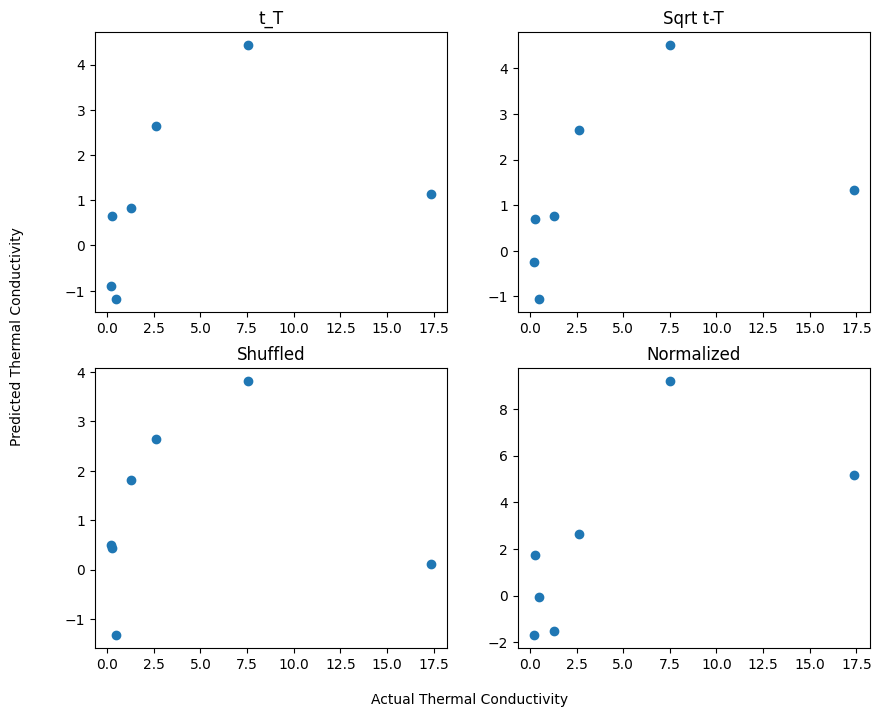

+------------+--------------------+----------------------+
| Data Type  | Mean Squared Error |   R-squared score    |
+------------+--------------------+----------------------+
|    t-T     | 39.61006675148554  | -0.1533863190533491  |
| Square t-T |  38.4418996287818  | -0.11937102728048465 |
|  Shuffled  | 45.04998124357535  | -0.31178855026799646 |
| Normalized | 23.719213153481487 |  0.3093317382781291  |
+------------+--------------------+----------------------+
39.61 & -0.153
38.442 & -0.119
45.05 & -0.312
23.719 & 0.309


In [ ]:
#Linear Regression  # filtered conductivity < 20
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()


# Import the data with 200 data points of temperature versus time and n independent parameters for each of the 48 materials

#merge_t_parameter_result = merge_t_parameter_result.apply(pd.to_numeric, errors='coerce')



# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result_filtered_20.iloc[:, :-1]
y_t_T = merge_t_parameter_result_filtered_20.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt_filtered_20.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt_filtered_20.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result_filtered_20.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result_filtered_20.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized_filtered_20.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized_filtered_20.iloc[:, -1]




# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)



# Scale the input features using StandardScaler
#scaler = StandardScaler()
#X_train_shuffled = scaler.fit_transform(X_train_shuffled)
# X_test_shuffled = scaler.transform(X_test_shuffled)


X_train_nomalized = scaler.fit_transform(X_train_nomalized)
X_test_nomalized = scaler.transform(X_test_nomalized)

X_train_shuffled = scaler.fit_transform(X_train_shuffled)
X_test_shuffled = scaler.transform(X_test_shuffled)

# Train a linear regression model
regressor1 = LinearRegression()
regressor2 = LinearRegression()
regressor3 = LinearRegression()
regressor4 = LinearRegression()

regressor1.fit(X_train_t_T, y_train_t_T)
regressor2.fit(X_train_sqrt,y_train_sqrt)
regressor3.fit(X_train_shuffled, y_train_shuffled)
regressor4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = regressor1.predict(X_test_t_T)
y_pred_sqrt = regressor2.predict(X_test_sqrt)
y_pred_shuffled = regressor3.predict(X_test_shuffled)
y_pred_nomalized = regressor4.predict(X_test_nomalized)


# Set up the plot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create scatter plots on each axis
axs[0, 0].scatter(y_test_t_T, y_pred_t_T)
axs[0, 1].scatter(y_test_sqrt, y_pred_sqrt)
axs[1, 0].scatter(y_test_shuffled, y_pred_shuffled)
axs[1, 1].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0, 0].set_title('t_T')
axs[0, 1].set_title('Sqrt t-T')
axs[1, 0].set_title('Shuffled')
axs[1, 1].set_title('Normalized')


# Set common x and y labels for the plot grid
fig.text(0.5, 0.04, "Actual Thermal Conductivity", ha='center')
fig.text(0.04, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)




from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['t-T', mse_t_T, regressor1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Square t-T', mse_sqrt, regressor2.score(X_test_sqrt, y_test_sqrt)])
table.add_row(['Shuffled', mse_shuffled, regressor3.score(X_test_shuffled, y_test_shuffled)])
table.add_row(['Normalized', mse_nomalized, regressor4.score(X_test_nomalized, y_test_nomalized)])


# print the table as a formatted output
print(table)


print(mse_t_T.round(3), '&', regressor1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', regressor2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', regressor3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', regressor4.score(X_test_nomalized, y_test_nomalized).round(3))

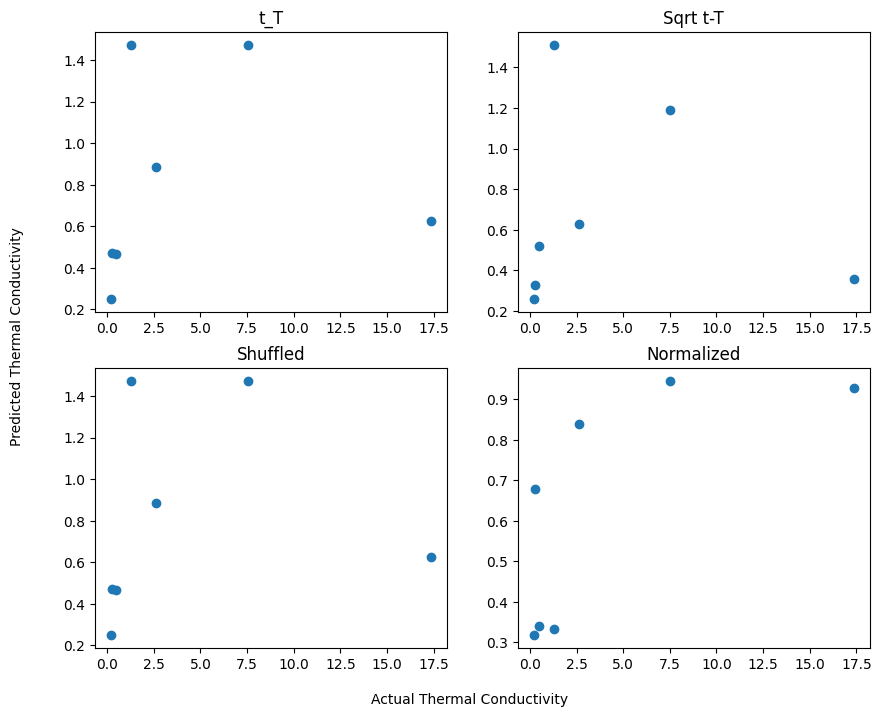

+------------+--------------------+----------------------+
| Data Type  | Mean Squared Error |   R-squared score    |
+------------+--------------------+----------------------+
|    t-T     | 45.73407995986593  | -0.33170848893414173 |
| Square t-T | 47.64425410724295  | -0.38732992331386096 |
|  Shuffled  | 45.73407995986593  | -0.33170848893414173 |
| Normalized |  45.4271024877131  | -0.3227697608360536  |
+------------+--------------------+----------------------+
45.734 & -0.332
47.644 & -0.387
45.734 & -0.332
45.427 & -0.323


In [ ]:
#SVR  # filtered conductivity < 20

from sklearn.svm import SVR
import numpy as np
# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


num_rows, num_cols = merge_t_parameter_result.shape
num_rows_norm, num_cols_norm = merge_t_parameter_result_normalized.shape

# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result_filtered_20.iloc[:, :-1]
y_t_T = merge_t_parameter_result_filtered_20.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt_filtered_20.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt_filtered_20.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result_filtered_20.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result_filtered_20.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized_filtered_20.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized_filtered_20.iloc[:, -1]


# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)


from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regression model to the training data
model1 = SVR(kernel='rbf', degree = 10) #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model2 = SVR(kernel='rbf', degree = 10)
model3 = SVR(kernel='rbf', degree = 10)
model4 = SVR(kernel='rbf', degree = 10)

model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_sqrt, y_train_sqrt)
model3.fit(X_train_shuffled, y_train_shuffled)
model4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = model1.predict(X_test_t_T)
y_pred_sqrt = model2.predict(X_test_sqrt)
y_pred_shuffled = model3.predict(X_test_shuffled)
y_pred_nomalized = model4.predict(X_test_nomalized)



# Plot the actual versus predicted thermal conductivity values
# Set up the plot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create scatter plots on each axis
axs[0, 0].scatter(y_test_t_T, y_pred_t_T)
axs[0, 1].scatter(y_test_sqrt, y_pred_sqrt)
axs[1, 0].scatter(y_test_shuffled, y_pred_shuffled)
axs[1, 1].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0, 0].set_title('t_T')
axs[0, 1].set_title('Sqrt t-T')
axs[1, 0].set_title('Shuffled')
axs[1, 1].set_title('Normalized')


# Set common x and y labels for the plot grid
fig.text(0.5, 0.04, "Actual Thermal Conductivity", ha='center')
fig.text(0.04, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')



# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)




from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['t-T', mse_t_T, model1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Square t-T', mse_sqrt, model2.score(X_test_sqrt, y_test_sqrt)])
table.add_row(['Shuffled', mse_shuffled, model3.score(X_test_shuffled, y_test_shuffled)])
table.add_row(['Normalized', mse_nomalized, model4.score(X_test_nomalized, y_test_nomalized)])


# print the table as a formatted output
print(table)


print(mse_t_T.round(3), '&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', model2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', model3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', model4.score(X_test_nomalized, y_test_nomalized).round(3))

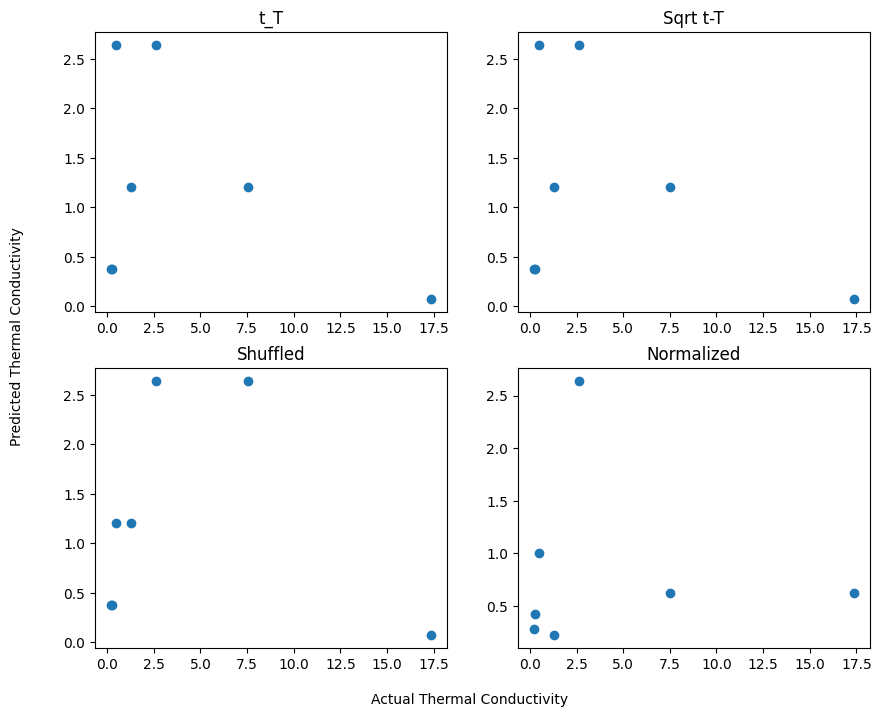

+------------+--------------------+---------------------+
| Data Type  | Mean Squared Error |   R-squared score   |
+------------+--------------------+---------------------+
|    t-T     | 49.11291142220724  | -0.4300950432285835 |
| Square t-T | 49.11291142220724  | -0.4300950432285835 |
|  Shuffled  | 46.218221045225405 | -0.3458059583438422 |
| Normalized | 47.05611737098041  | -0.3702042549933837 |
+------------+--------------------+---------------------+
49.113 & -0.43
49.113 & -0.43
46.218 & -0.346
47.056 & -0.37


In [ ]:
#DecisionTreeRegressor  # filtered conductivity < 20

from sklearn.tree import DecisionTreeRegressor
import numpy as np
# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result_filtered_20.iloc[:, :-1]
y_t_T = merge_t_parameter_result_filtered_20.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt_filtered_20.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt_filtered_20.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result_filtered_20.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result_filtered_20.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized_filtered_20.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized_filtered_20.iloc[:, -1]


# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)


# Fit a random forest regression model to the training data
model1 = DecisionTreeRegressor(max_depth=5)
model2 = DecisionTreeRegressor(max_depth=5)
model3 = DecisionTreeRegressor(max_depth=5)
model4 = DecisionTreeRegressor(max_depth=5)

model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_sqrt, y_train_sqrt)
model3.fit(X_train_shuffled, y_train_shuffled)
model4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = model1.predict(X_test_t_T)
y_pred_sqrt = model2.predict(X_test_sqrt)
y_pred_shuffled = model3.predict(X_test_shuffled)
y_pred_nomalized = model4.predict(X_test_nomalized)



# Plot the actual versus predicted thermal conductivity values
# Set up the plot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create scatter plots on each axis
axs[0, 0].scatter(y_test_t_T, y_pred_t_T)
axs[0, 1].scatter(y_test_sqrt, y_pred_sqrt)
axs[1, 0].scatter(y_test_shuffled, y_pred_shuffled)
axs[1, 1].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0, 0].set_title('t_T')
axs[0, 1].set_title('Sqrt t-T')
axs[1, 0].set_title('Shuffled')
axs[1, 1].set_title('Normalized')


# Set common x and y labels for the plot grid
fig.text(0.5, 0.04, "Actual Thermal Conductivity", ha='center')
fig.text(0.04, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)




from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['t-T', mse_t_T, model1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Square t-T', mse_sqrt, model2.score(X_test_sqrt, y_test_sqrt)])
table.add_row(['Shuffled', mse_shuffled, model3.score(X_test_shuffled, y_test_shuffled)])
table.add_row(['Normalized', mse_nomalized, model4.score(X_test_nomalized, y_test_nomalized)])


# print the table as a formatted output
print(table)

print(mse_t_T.round(3), '&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', model2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', model3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', model4.score(X_test_nomalized, y_test_nomalized).round(3))

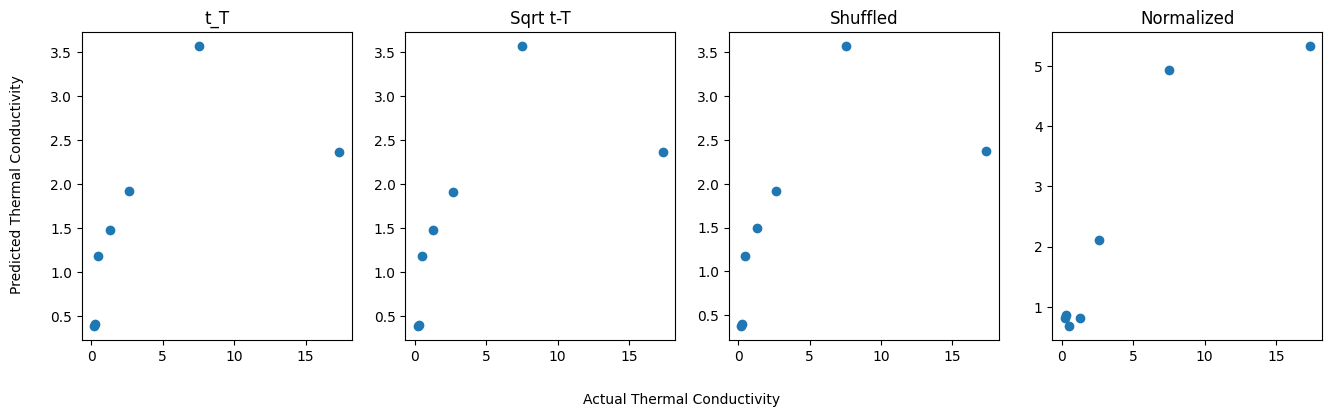

+------------+--------------------+------------------------+------------------------------+
| Data Type  | Mean Squared Error |    R-squared score     | Coefficient of determination |
+------------+--------------------+------------------------+------------------------------+
|    t-T     | 34.54798299919925  | -0.005985957866876612  |    -0.005985957866876612     |
| Square t-T | 34.548930483206625 | -0.006013547194066771  |    -0.006013547194066771     |
|  Shuffled  | 34.488191273018494 | -0.0042449115969436235 |    -0.004244911596943846     |
| Normalized | 21.838757615704555 |   0.3640878108812807   |      0.3640878108812806      |
+------------+--------------------+------------------------+------------------------------+
34.548 & -0.006
34.549 & -0.006
34.488 & -0.004
21.839 & 0.364


In [ ]:
#RandomForestRegressor  # filtered conductivity < 50

from sklearn.ensemble import RandomForestRegressor


num_rows, num_cols = merge_t_parameter_result.shape
num_rows_norm, num_cols_norm = merge_t_parameter_result_normalized.shape

# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result_filtered_20.iloc[:, :-1]
y_t_T = merge_t_parameter_result_filtered_20.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt_filtered_20.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt_filtered_20.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result_filtered_20.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result_filtered_20.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized_filtered_20.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized_filtered_20.iloc[:, -1]



# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)

# Fit a random forest regression model to the training data
model1 = RandomForestRegressor(n_estimators=1000, random_state=0)
model2 = RandomForestRegressor(n_estimators=1000, random_state=0)
model3 = RandomForestRegressor(n_estimators=1000, random_state=0)
model4 = RandomForestRegressor(n_estimators=1000, random_state=0)

model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_sqrt, y_train_sqrt)
model3.fit(X_train_shuffled, y_train_shuffled)
model4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = model1.predict(X_test_t_T)
y_pred_sqrt = model2.predict(X_test_sqrt)
y_pred_shuffled = model3.predict(X_test_shuffled)
y_pred_nomalized = model4.predict(X_test_nomalized)



# Plot the actual versus predicted thermal conductivity values
# Set up the plot grid
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Create scatter plots on each axis
axs[0].scatter(y_test_t_T, y_pred_t_T)
axs[1].scatter(y_test_sqrt, y_pred_sqrt)
axs[2].scatter(y_test_shuffled, y_pred_shuffled)
axs[3].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0].set_title('t_T')
axs[1].set_title('Sqrt t-T')
axs[2].set_title('Shuffled')
axs[3].set_title('Normalized')


# Set common x and y labels for the plot grid

fig.text(0.5, -0.05, "Actual Thermal Conductivity", ha='center')
fig.text(0.08, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
r2_t_T = r2_score(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
r2_sqrt = r2_score(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
r2_shuffled = r2_score(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)
r2_nomalized = r2_score(y_test_nomalized, y_pred_nomalized)
cod_t_T = 1 - mse_t_T/np.var(y_test_t_T)
cod_sqrt = 1 - mse_sqrt/np.var(y_test_sqrt)
cod_shuffled = 1 - mse_shuffled/np.var(y_test_shuffled)
cod_nomalized = 1 - mse_nomalized/np.var(y_test_nomalized)

from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score', 'Coefficient of determination'])
table.add_row(['t-T', mse_t_T, model1.score(X_test_t_T, y_test_t_T),cod_t_T])
table.add_row(['Square t-T', mse_sqrt, model2.score(X_test_sqrt, y_test_sqrt),cod_sqrt])
table.add_row(['Shuffled', mse_shuffled, model3.score(X_test_shuffled, y_test_shuffled),cod_shuffled])
table.add_row(['Normalized', mse_nomalized, model4.score(X_test_nomalized, y_test_nomalized),cod_nomalized])


# print the table as a formatted output
print(table)


print(mse_t_T.round(3), '&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', model2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', model3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', model4.score(X_test_nomalized, y_test_nomalized).round(3))

# filtered conductivity < 1

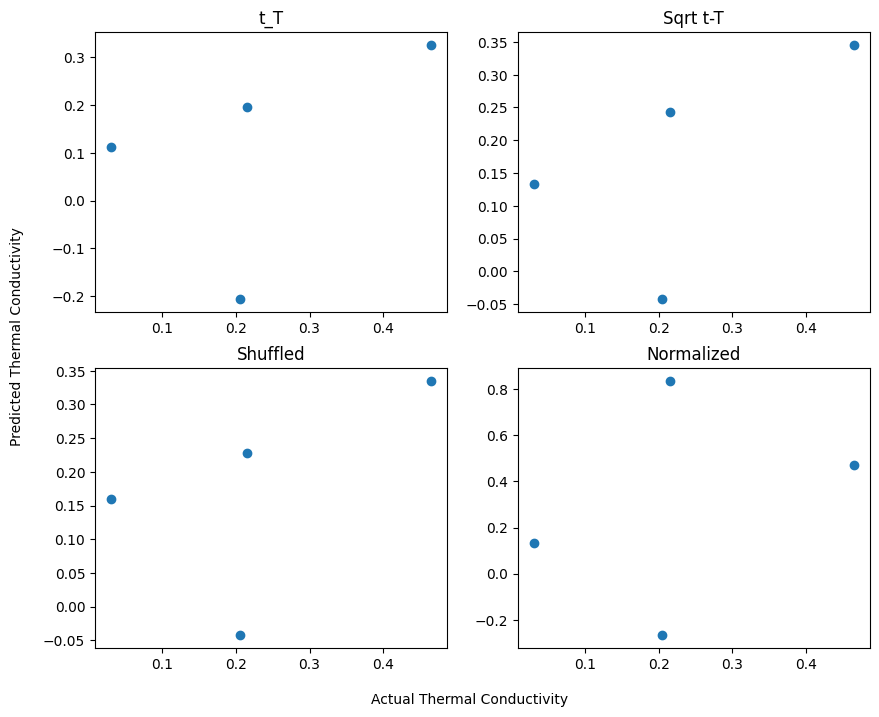

+------------+----------------------+----------------------+
| Data Type  |  Mean Squared Error  |   R-squared score    |
+------------+----------------------+----------------------+
|    t-T     | 0.048984213496205235 |  -1.041884713600496  |
| Square t-T |  0.0217452838309486  | 0.09355771016395487  |
|  Shuffled  | 0.02371216751542056  | 0.011569056226199081 |
| Normalized | 0.15460214213318949  | -5.4445201459875685  |
+------------+----------------------+----------------------+
0.049 & -1.042
0.022 & 0.094
0.024 & 0.012
0.155 & -5.445


In [ ]:
#Linear Regression  # filtered conductivity < 1
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()


# Import the data with 200 data points of temperature versus time and n independent parameters for each of the 48 materials

#merge_t_parameter_result = merge_t_parameter_result.apply(pd.to_numeric, errors='coerce')



# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result_filtered_1.iloc[:, :-1]
y_t_T = merge_t_parameter_result_filtered_1.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt_filtered_1.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt_filtered_1.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result_filtered_1.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result_filtered_1.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized_filtered_1.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized_filtered_1.iloc[:, -1]




# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)



# Scale the input features using StandardScaler
#scaler = StandardScaler()
#X_train_shuffled = scaler.fit_transform(X_train_shuffled)
# X_test_shuffled = scaler.transform(X_test_shuffled)


X_train_nomalized = scaler.fit_transform(X_train_nomalized)
X_test_nomalized = scaler.transform(X_test_nomalized)

X_train_shuffled = scaler.fit_transform(X_train_shuffled)
X_test_shuffled = scaler.transform(X_test_shuffled)

# Train a linear regression model
regressor1 = LinearRegression()
regressor2 = LinearRegression()
regressor3 = LinearRegression()
regressor4 = LinearRegression()

regressor1.fit(X_train_t_T, y_train_t_T)
regressor2.fit(X_train_sqrt,y_train_sqrt)
regressor3.fit(X_train_shuffled, y_train_shuffled)
regressor4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = regressor1.predict(X_test_t_T)
y_pred_sqrt = regressor2.predict(X_test_sqrt)
y_pred_shuffled = regressor3.predict(X_test_shuffled)
y_pred_nomalized = regressor4.predict(X_test_nomalized)


# Set up the plot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create scatter plots on each axis
axs[0, 0].scatter(y_test_t_T, y_pred_t_T)
axs[0, 1].scatter(y_test_sqrt, y_pred_sqrt)
axs[1, 0].scatter(y_test_shuffled, y_pred_shuffled)
axs[1, 1].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0, 0].set_title('t_T')
axs[0, 1].set_title('Sqrt t-T')
axs[1, 0].set_title('Shuffled')
axs[1, 1].set_title('Normalized')


# Set common x and y labels for the plot grid
fig.text(0.5, 0.04, "Actual Thermal Conductivity", ha='center')
fig.text(0.04, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)




from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['t-T', mse_t_T, regressor1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Square t-T', mse_sqrt, regressor2.score(X_test_sqrt, y_test_sqrt)])
table.add_row(['Shuffled', mse_shuffled, regressor3.score(X_test_shuffled, y_test_shuffled)])
table.add_row(['Normalized', mse_nomalized, regressor4.score(X_test_nomalized, y_test_nomalized)])


# print the table as a formatted output
print(table)

print(mse_t_T.round(3), '&', regressor1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', regressor2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', regressor3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', regressor4.score(X_test_nomalized, y_test_nomalized).round(3))

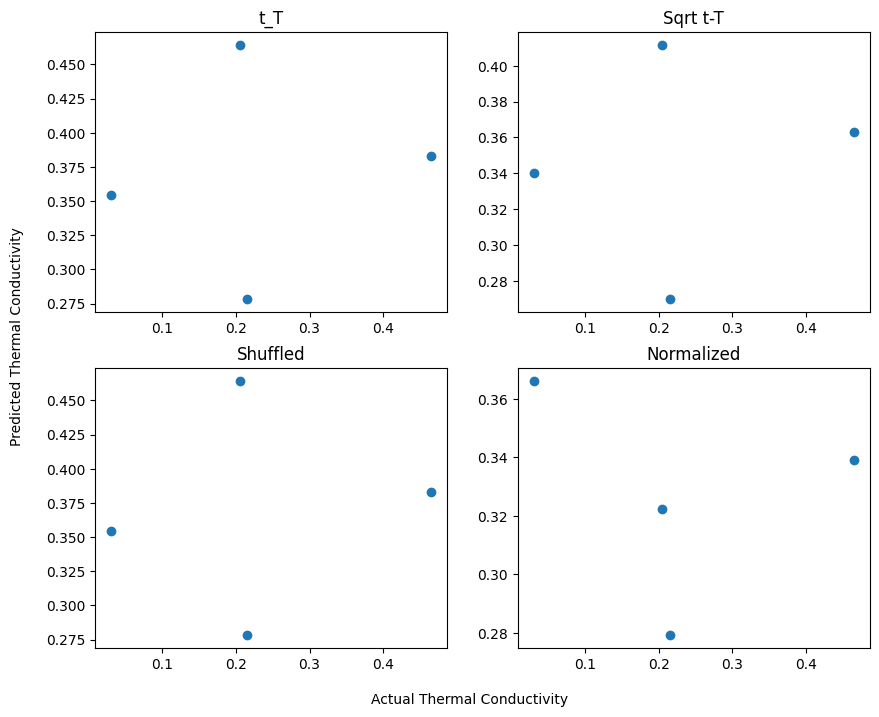

+------------+----------------------+---------------------+
| Data Type  |  Mean Squared Error  |   R-squared score   |
+------------+----------------------+---------------------+
|    t-T     | 0.04577493071908906  | -0.9081072172092857 |
| Square t-T | 0.037961663066006325 | -0.5824147002653364 |
|  Shuffled  | 0.04577493071908906  | -0.9081072172092857 |
| Normalized | 0.03661754118616529  | -0.5263855895830551 |
+------------+----------------------+---------------------+
0.046 & -0.908
0.038 & -0.582
0.046 & -0.908
0.037 & -0.526


In [ ]:
#SVR  # filtered conductivity < 1

from sklearn.svm import SVR
import numpy as np
# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


num_rows, num_cols = merge_t_parameter_result.shape
num_rows_norm, num_cols_norm = merge_t_parameter_result_normalized.shape

# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result_filtered_1.iloc[:, :-1]
y_t_T = merge_t_parameter_result_filtered_1.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt_filtered_1.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt_filtered_1.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result_filtered_1.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result_filtered_1.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized_filtered_1.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized_filtered_1.iloc[:, -1]


# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)


from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regression model to the training data
model1 = SVR(kernel='rbf', degree = 10) #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model2 = SVR(kernel='rbf', degree = 10)
model3 = SVR(kernel='rbf', degree = 10)
model4 = SVR(kernel='rbf', degree = 10)

model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_sqrt, y_train_sqrt)
model3.fit(X_train_shuffled, y_train_shuffled)
model4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = model1.predict(X_test_t_T)
y_pred_sqrt = model2.predict(X_test_sqrt)
y_pred_shuffled = model3.predict(X_test_shuffled)
y_pred_nomalized = model4.predict(X_test_nomalized)



# Plot the actual versus predicted thermal conductivity values
# Set up the plot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create scatter plots on each axis
axs[0, 0].scatter(y_test_t_T, y_pred_t_T)
axs[0, 1].scatter(y_test_sqrt, y_pred_sqrt)
axs[1, 0].scatter(y_test_shuffled, y_pred_shuffled)
axs[1, 1].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0, 0].set_title('t_T')
axs[0, 1].set_title('Sqrt t-T')
axs[1, 0].set_title('Shuffled')
axs[1, 1].set_title('Normalized')


# Set common x and y labels for the plot grid
fig.text(0.5, 0.04, "Actual Thermal Conductivity", ha='center')
fig.text(0.04, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)




from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['t-T', mse_t_T, model1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Square t-T', mse_sqrt, model2.score(X_test_sqrt, y_test_sqrt)])
table.add_row(['Shuffled', mse_shuffled, model3.score(X_test_shuffled, y_test_shuffled)])
table.add_row(['Normalized', mse_nomalized, model4.score(X_test_nomalized, y_test_nomalized)])


# print the table as a formatted output
print(table)


print(mse_t_T.round(3), '&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', model2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', model3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', model4.score(X_test_nomalized, y_test_nomalized).round(3))

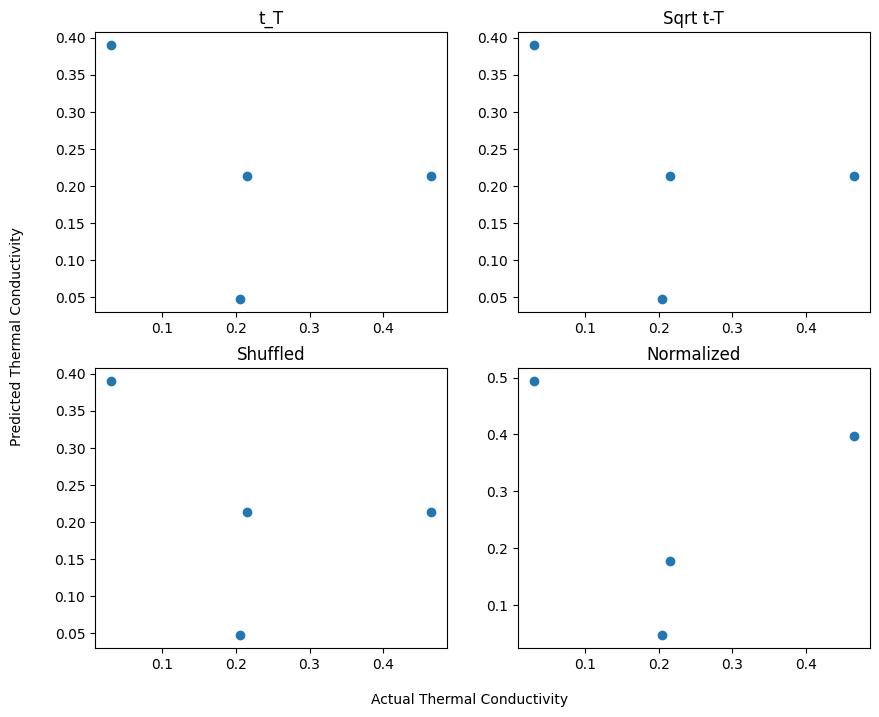

+------------+----------------------+---------------------+
| Data Type  |  Mean Squared Error  |   R-squared score   |
+------------+----------------------+---------------------+
|    t-T     | 0.05446255324417105  |  -1.270246820264676 |
| Square t-T | 0.05446255324417105  |  -1.270246820264676 |
|  Shuffled  | 0.05446255324417105  |  -1.270246820264676 |
| Normalized | 0.061532700331561205 | -1.5649626936096142 |
+------------+----------------------+---------------------+
0.054 & -1.27
0.054 & -1.27
0.054 & -1.27
0.062 & -1.565


In [ ]:
#DecisionTreeRegressor  # filtered conductivity < 1

from sklearn.tree import DecisionTreeRegressor
import numpy as np
# Evaluate the model using mean squared error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result_filtered_1.iloc[:, :-1]
y_t_T = merge_t_parameter_result_sqrt_filtered_1.iloc[:, -1]

X_sqrt = merge_t_parameter_result_sqrt_filtered_1.iloc[:, :-1]
y_sqrt = merge_t_parameter_result_sqrt_filtered_1.iloc[:, -1]

X_shuffled = merge_t_parameter_shuffled_result_filtered_1.iloc[:, :-1]
y_shuffled = merge_t_parameter_shuffled_result_filtered_1.iloc[:, -1]

X_nomalized = merge_t_parameter_result_normalized_filtered_1.iloc[:, :-1]
y_nomalized = merge_t_parameter_result_normalized_filtered_1.iloc[:, -1]


# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)


# Fit a random forest regression model to the training data
model1 = DecisionTreeRegressor(max_depth=5)
model2 = DecisionTreeRegressor(max_depth=5)
model3 = DecisionTreeRegressor(max_depth=5)
model4 = DecisionTreeRegressor(max_depth=5)

model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_sqrt, y_train_sqrt)
model3.fit(X_train_shuffled, y_train_shuffled)
model4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = model1.predict(X_test_t_T)
y_pred_sqrt = model2.predict(X_test_sqrt)
y_pred_shuffled = model3.predict(X_test_shuffled)
y_pred_nomalized = model4.predict(X_test_nomalized)



# Plot the actual versus predicted thermal conductivity values
# Set up the plot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create scatter plots on each axis
axs[0, 0].scatter(y_test_t_T, y_pred_t_T)
axs[0, 1].scatter(y_test_sqrt, y_pred_sqrt)
axs[1, 0].scatter(y_test_shuffled, y_pred_shuffled)
axs[1, 1].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0, 0].set_title('t_T')
axs[0, 1].set_title('Sqrt t-T')
axs[1, 0].set_title('Shuffled')
axs[1, 1].set_title('Normalized')


# Set common x and y labels for the plot grid
fig.text(0.5, 0.04, "Actual Thermal Conductivity", ha='center')
fig.text(0.04, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)




from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score'])
table.add_row(['t-T', mse_t_T, model1.score(X_test_t_T, y_test_t_T)])
table.add_row(['Square t-T', mse_sqrt, model2.score(X_test_sqrt, y_test_sqrt)])
table.add_row(['Shuffled', mse_shuffled, model3.score(X_test_shuffled, y_test_shuffled)])
table.add_row(['Normalized', mse_nomalized, model4.score(X_test_nomalized, y_test_nomalized)])


# print the table as a formatted output
print(table)


print(mse_t_T.round(3), '&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', model2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', model3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', model4.score(X_test_nomalized, y_test_nomalized).round(3))

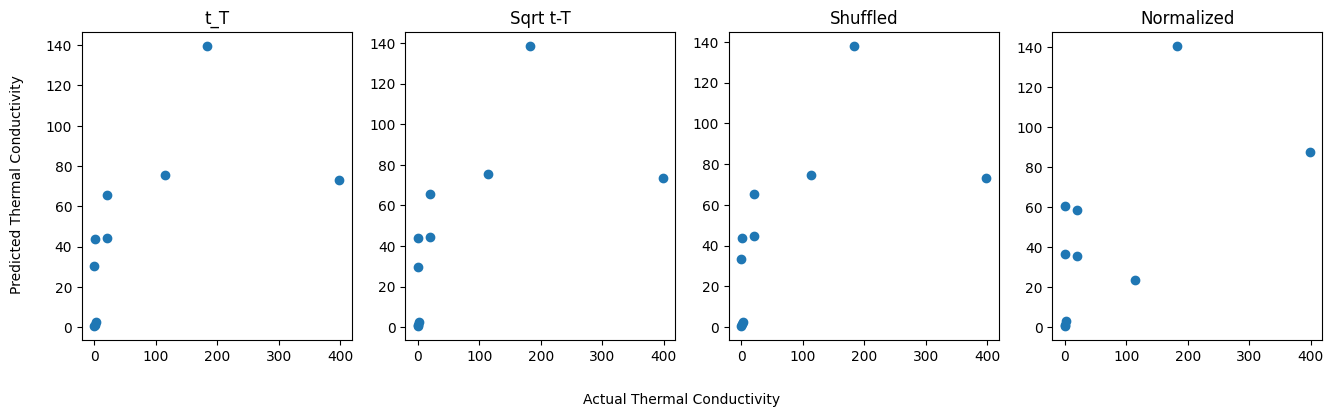

+------------+--------------------+---------------------+------------------------------+
| Data Type  | Mean Squared Error |   R-squared score   | Coefficient of determination |
+------------+--------------------+---------------------+------------------------------+
|    t-T     | 11453.872833103082 | 0.24241743792587556 |     0.24241743792587545      |
| Square t-T | 11460.220214632865 |  0.2419976091367957 |      0.2419976091367957      |
|  Shuffled  | 11508.915082869598 | 0.23877683101430525 |     0.23877683101430525      |
| Normalized | 11323.141847937271 | 0.25106425251230535 |     0.25106425251230535      |
+------------+--------------------+---------------------+------------------------------+
11453.873 & 0.242
11460.22 & 0.242
11508.915 & 0.239
11323.142 & 0.251


In [ ]:
from sklearn.ensemble import RandomForestRegressor


num_rows, num_cols = merge_t_parameter_result.shape
num_rows_norm, num_cols_norm = merge_t_parameter_result_normalized.shape

# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result.iloc[:, :num_cols-1]
y_t_T = merge_t_parameter_result.iloc[:, num_cols-1]

X_sqrt = merge_t_parameter_result_sqrt.iloc[:, :num_cols-1]
y_sqrt = merge_t_parameter_result_sqrt.iloc[:, num_cols-1]

X_shuffled = merge_t_parameter_shuffled_result.iloc[:, :num_cols-1]
y_shuffled = merge_t_parameter_shuffled_result.iloc[:, num_cols-1]

X_nomalized = merge_t_parameter_result_normalized.iloc[:, :num_cols_norm-1]
y_nomalized = merge_t_parameter_result_normalized.iloc[:, num_cols_norm-1]




# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)

# Fit a random forest regression model to the training data
model1 = RandomForestRegressor(n_estimators=1000, random_state=0)
model2 = RandomForestRegressor(n_estimators=1000, random_state=0)
model3 = RandomForestRegressor(n_estimators=1000, random_state=0)
model4 = RandomForestRegressor(n_estimators=1000, random_state=0)

model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_sqrt, y_train_sqrt)
model3.fit(X_train_shuffled, y_train_shuffled)
model4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = model1.predict(X_test_t_T)
y_pred_sqrt = model2.predict(X_test_sqrt)
y_pred_shuffled = model3.predict(X_test_shuffled)
y_pred_nomalized = model4.predict(X_test_nomalized)



# Plot the actual versus predicted thermal conductivity values
# Set up the plot grid
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Create scatter plots on each axis
axs[0].scatter(y_test_t_T, y_pred_t_T)
axs[1].scatter(y_test_sqrt, y_pred_sqrt)
axs[2].scatter(y_test_shuffled, y_pred_shuffled)
axs[3].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0].set_title('t_T')
axs[1].set_title('Sqrt t-T')
axs[2].set_title('Shuffled')
axs[3].set_title('Normalized')


# Set common x and y labels for the plot grid
fig.text(0.5, -0.05, "Actual Thermal Conductivity", ha='center')
fig.text(0.08, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')
# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
r2_t_T = r2_score(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
r2_sqrt = r2_score(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
r2_shuffled = r2_score(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)
r2_nomalized = r2_score(y_test_nomalized, y_pred_nomalized)
cod_t_T = 1 - mse_t_T/np.var(y_test_t_T)
cod_sqrt = 1 - mse_sqrt/np.var(y_test_sqrt)
cod_shuffled = 1 - mse_shuffled/np.var(y_test_shuffled)
cod_nomalized = 1 - mse_nomalized/np.var(y_test_nomalized)

from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score', 'Coefficient of determination'])
table.add_row(['t-T', mse_t_T, model1.score(X_test_t_T, y_test_t_T),cod_t_T])
table.add_row(['Square t-T', mse_sqrt, model2.score(X_test_sqrt, y_test_sqrt),cod_sqrt])
table.add_row(['Shuffled', mse_shuffled, model3.score(X_test_shuffled, y_test_shuffled),cod_shuffled])
table.add_row(['Normalized', mse_nomalized, model4.score(X_test_nomalized, y_test_nomalized),cod_nomalized])


# print the table as a formatted output
print(table)

print(mse_t_T.round(3), '&', model1.score(X_test_t_T, y_test_t_T).round(3))
print(mse_sqrt.round(3),'&', model2.score(X_test_sqrt, y_test_sqrt).round(3))
print(mse_shuffled.round(3),'&', model3.score(X_test_shuffled, y_test_shuffled).round(3))
print(mse_nomalized.round(3),'&', model4.score(X_test_nomalized, y_test_nomalized).round(3))

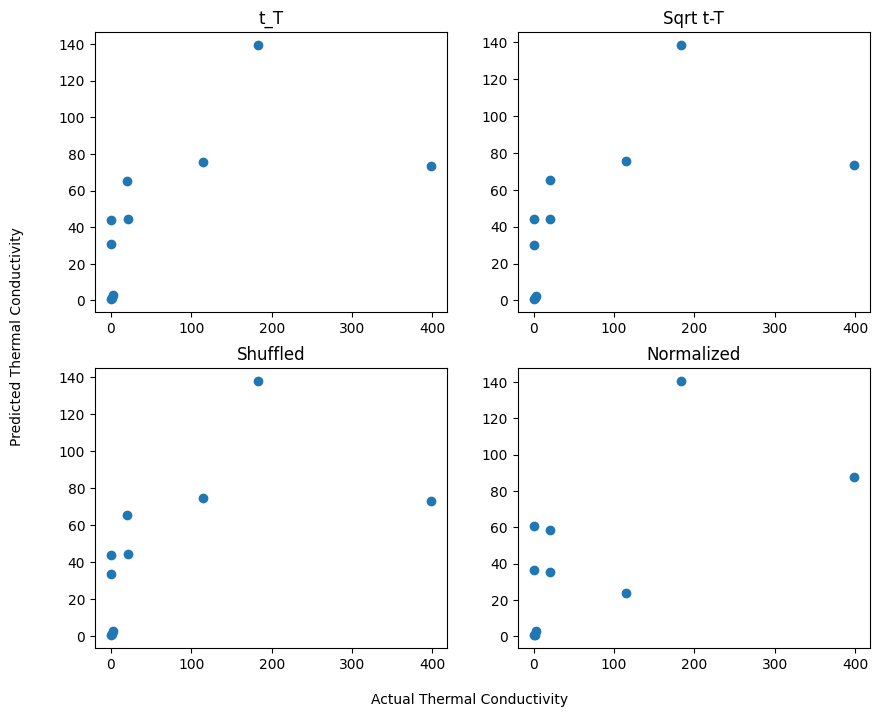

+------------+--------------------+---------------------+------------------------------+
| Data Type  | Mean Squared Error |   R-squared score   | Coefficient of determination |
+------------+--------------------+---------------------+------------------------------+
|    t-T     | 11453.872833103082 | 0.24241743792587556 |     0.24241743792587545      |
| Square t-T | 11460.220214632865 |  0.2419976091367957 |      0.2419976091367957      |
|  Shuffled  | 11508.915082869598 | 0.23877683101430525 |     0.23877683101430525      |
| Normalized | 11323.141847937271 | 0.25106425251230535 |     0.25106425251230535      |
+------------+--------------------+---------------------+------------------------------+


In [ ]:
from sklearn.ensemble import RandomForestRegressor


num_rows, num_cols = merge_t_parameter_result.shape
num_rows_norm, num_cols_norm = merge_t_parameter_result_normalized.shape

# Split the data into features and target
# t-T // sqrt t-T // Shuffled // nomalized
X_t_T = merge_t_parameter_result.iloc[:, :num_cols-1]
y_t_T = merge_t_parameter_result.iloc[:, num_cols-1]

X_sqrt = merge_t_parameter_result_sqrt.iloc[:, :num_cols-1]
y_sqrt = merge_t_parameter_result_sqrt.iloc[:, num_cols-1]

X_shuffled = merge_t_parameter_shuffled_result.iloc[:, :num_cols-1]
y_shuffled = merge_t_parameter_shuffled_result.iloc[:, num_cols-1]

X_nomalized = merge_t_parameter_result_normalized.iloc[:, :num_cols_norm-1]
y_nomalized = merge_t_parameter_result_normalized.iloc[:, num_cols_norm-1]



# Split the data into training and testing sets

X_train_t_T, X_test_t_T, y_train_t_T, y_test_t_T = train_test_split(X_t_T, y_t_T, test_size=0.2, random_state=0)
X_train_sqrt, X_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(X_sqrt, y_sqrt, test_size=0.2, random_state=0)
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=0)
X_train_nomalized, X_test_nomalized, y_train_nomalized, y_test_nomalized = train_test_split(X_nomalized, y_nomalized, test_size=0.2, random_state=0)

# Fit a random forest regression model to the training data
model1 = RandomForestRegressor(n_estimators=1000, random_state=0)
model2 = RandomForestRegressor(n_estimators=1000, random_state=0)
model3 = RandomForestRegressor(n_estimators=1000, random_state=0)
model4 = RandomForestRegressor(n_estimators=1000, random_state=0)

model1.fit(X_train_t_T, y_train_t_T)
model2.fit(X_train_sqrt, y_train_sqrt)
model3.fit(X_train_shuffled, y_train_shuffled)
model4.fit(X_train_nomalized, y_train_nomalized)

# Make predictions on the testing data
y_pred_t_T = model1.predict(X_test_t_T)
y_pred_sqrt = model2.predict(X_test_sqrt)
y_pred_shuffled = model3.predict(X_test_shuffled)
y_pred_nomalized = model4.predict(X_test_nomalized)



# Plot the actual versus predicted thermal conductivity values
# Set up the plot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create scatter plots on each axis
axs[0, 0].scatter(y_test_t_T, y_pred_t_T)
axs[0, 1].scatter(y_test_sqrt, y_pred_sqrt)
axs[1, 0].scatter(y_test_shuffled, y_pred_shuffled)
axs[1, 1].scatter(y_test_nomalized, y_pred_nomalized)

# Add title to each subplot
axs[0, 0].set_title('t_T')
axs[0, 1].set_title('Sqrt t-T')
axs[1, 0].set_title('Shuffled')
axs[1, 1].set_title('Normalized')


# Set common x and y labels for the plot grid
fig.text(0.5, 0.04, "Actual Thermal Conductivity", ha='center')
fig.text(0.04, 0.5, "Predicted Thermal Conductivity", va='center', rotation='vertical')

# Show the plot
plt.show()

# Evaluate the model using mean squared error
mse_t_T = mean_squared_error(y_test_t_T, y_pred_t_T)
r2_t_T = r2_score(y_test_t_T, y_pred_t_T)
mse_sqrt = mean_squared_error(y_test_sqrt, y_pred_sqrt)
r2_sqrt = r2_score(y_test_sqrt, y_pred_sqrt)
mse_shuffled = mean_squared_error(y_test_shuffled, y_pred_shuffled)
r2_shuffled = r2_score(y_test_shuffled, y_pred_shuffled)
mse_nomalized = mean_squared_error(y_test_nomalized, y_pred_nomalized)
r2_nomalized = r2_score(y_test_nomalized, y_pred_nomalized)
cod_t_T = 1 - mse_t_T/np.var(y_test_t_T)
cod_sqrt = 1 - mse_sqrt/np.var(y_test_sqrt)
cod_shuffled = 1 - mse_shuffled/np.var(y_test_shuffled)
cod_nomalized = 1 - mse_nomalized/np.var(y_test_nomalized)

from prettytable import PrettyTable

# create a table with custom headers and data
table = PrettyTable(['Data Type','Mean Squared Error', 'R-squared score', 'Coefficient of determination'])
table.add_row(['t-T', mse_t_T, model1.score(X_test_t_T, y_test_t_T),cod_t_T])
table.add_row(['Square t-T', mse_sqrt, model2.score(X_test_sqrt, y_test_sqrt),cod_sqrt])
table.add_row(['Shuffled', mse_shuffled, model3.score(X_test_shuffled, y_test_shuffled),cod_shuffled])
table.add_row(['Normalized', mse_nomalized, model4.score(X_test_nomalized, y_test_nomalized),cod_nomalized])


# print the table as a formatted output
print(table)